<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Integración numérica Montecarlo</font> </center>




**Referencia:**
- https://ocw.mit.edu/courses/mechanical-engineering/2-086-numerical-computation-for-mechanical-engineers-fall-2014/nutshells-guis/MIT2_086F14_Monte_Carlo.pdf
- http://ta.twi.tudelft.nl/mf/users/oosterle/oosterlee/lec8-hit-2009.pdf
- Sauer, Timothy. *Análisis Numérico*, 2da. Edición, ISBN: 978-607-32-2059-0.

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/f/f2/Integral_as_region_under_curve.svg" width="300px" height="100px" />



## Motivación

En análisis de ingeniería, normalmente debemos evaluar integrales definidas sobre un dominio complejo o en un espacio de dimensión alta.

> Por ejemplo, podríamos querer calcular:
> - la deflexión en una viga de geometría complicada, 
> - el volumen de una parte tridimensional de una aeronave,
> - o evaluar alguna medida de rendimiento (rentabilidad) en algún proceso que sea expresada como una integral de alguna función sin antiderivada primitiva (que se pueda expresar en términos de funciones elementales).

A la mano tenemos herramientas de integración analítica cuando tanto el espacio de integración como la función a integrar son simples. Cuando la función a integrar es difícil (incluso, imposible) de integrar podemos aún recurrir a métodos numéricos de integración. 

> Desafortunadamente, los métodos determinísiticos de integración fallan cuando:
> - la región es demasiado compleja para discretizarla,
> - o la función a integrar es demasiado irregular,
> - o la convergencia es demasiado lenta debido a la alta dimensionalidad del espacio de integración (ver [Maldición de la dimensionalidad](https://es.wikipedia.org/wiki/Maldici%C3%B3n_de_la_dimensi%C3%B3n)).

Por eso en esta clase veremos una *técnica alternativa de integración numérica*: **Integración Montecarlo**.

### Ejemplos de funciones sin antiderivada primitiva.

De su curso de cálculo integral seguro recordarán (o estarán viendo) que existen funciones cuya integral no tiene primitiva. Es decir, **que no podemos encontrar una función que se pueda expresar en forma de funciones elementales cuya derivada sea tal función**.

Esto **no significa que dicha función no se pueda integrar**, ya que sabemos que cualquier función continua es integrable (y la mayoría de funciones que vemos a ese nivel, lo son). Lo que ocurre es que no podemos expresar dicha integral de una forma sencilla (por ejemplo, en función de exponenciales, senos, cosenos, logaritmos...).

Algunas integrales que no son elementales son:
- $\int e^{p(x)}\text{d}x$, donde $p(x)$ es un polinomio de grado mayor o igual a dos.
- $\int \frac{1}{log(x)}\text{d}x$.
- $\int \frac{sin(x)}{x}\text{d}x$

**Referencia:**
- https://www.gaussianos.com/funciones-sin-primitiva-elemental/

### Ejemplos de regiones difíciles de discretizar.

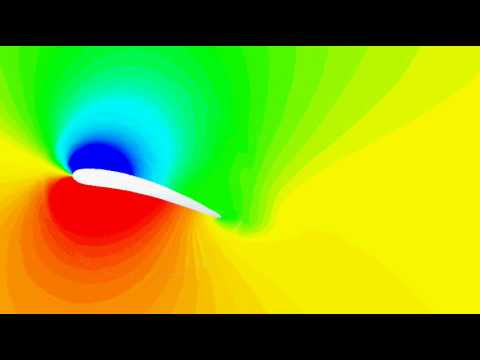

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Ti5zUD08w5s')

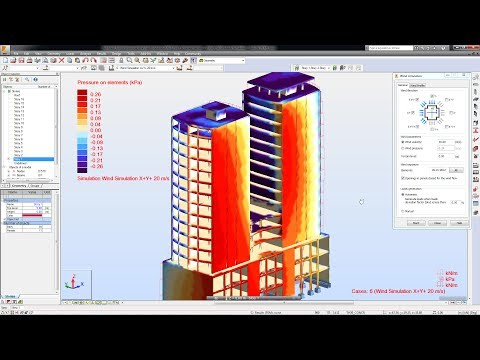

In [2]:
YouTubeVideo('jmsFC0mNayM')

___
## Integración Montecarlo tipo 1
Se basa en la definición de *valor promedio* de una función y en el *valor esperado* de una *variable aleatoria uniforme*.

Presentamos esto mediante un ejemplo.

**Ejemplo.** Aproxime el área bajo la curva $y=x^2$ en el intervalo $\left[0,1\right]$.

Veamos primero cómo luce dicha área.

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
#Definir la función f(x)= x**2
def f(x):
    return x**2

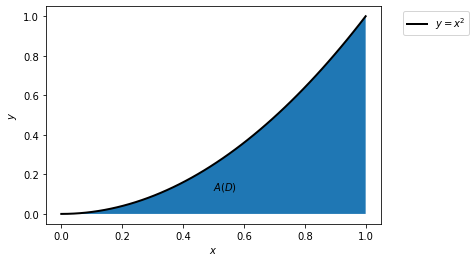

In [5]:
# Dibujamos la región
# Generamos los puntos de la curva y=x^2
x = np.linspace(0,1)
y = f(x)
#Dibujar la función
plt.figure(figsize=(6,4))
plt.plot(x, y, 'k', lw=2, label='$y=x^2$')
# Rellenamos la regíon de interes
plt.fill_between(x,y)
plt.text(0.5, 0.125, '$A(D)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='upper left', bbox_to_anchor=(1.05,1))
plt.show()

Entonces, lo que queremos es aproximar el área de la región $\mathcal{D}$. Llamaremos esta área $A(\mathcal{D})$.

De cálculo integral, sabemos que

$$A(\mathcal{D})=\int_{0}^{1}y\text{d}x=\int_{0}^{1}x^2\text{d}x$$.

Por *definición*, el **valor promedio** de una función $f:\left[a,b\right]\to\mathbb{R}$ en un intervalo $\left[a,b\right]$ es

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x.$$

Entonces, el área bajo la curva $y=x^2$ es exactamente el valor promedio de $f(x)=x^2$ en $\left[0,1\right]$. Este valor promedio puede aproximarse mediante el promedio de los valores de la función en puntos aleatorios **uniformemente distribuidos** en el intervalo $\left[0,1\right]$. Es decir,

$$A(\mathcal{D})=\int_{0}^{1}x^2\text{d}x=\int_{0}^{1}f(x)\text{d}x\approx \frac{1}{N}\sum_{i=1}^{N}f(u_i)=\frac{1}{N}\sum_{i=1}^{N}u_i^2$$,

donde $u_i$ son realizaciones de la variable aleatoria $U\sim\mathcal{U}\left[0,1\right]$ ($U$ distribuye uniformemente en el intervalo $\left[0,1\right]$).

**¿Cómo construit vectores de números aleatorios?**
- Ver [numpy.random](https://docs.scipy.org/doc/numpy-1.10.0/reference/routines.random.html).

En este caso necesitamos $N$ números aleatorios uniformemente distribuidos...

In [6]:
# ayuda en la funcion uniform de la libreria numpy.random
help(np.random.uniform)

Help on built-in function uniform:

uniform(...) method of numpy.random.mtrand.RandomState instance
    uniform(low=0.0, high=1.0, size=None)
    
    Draw samples from a uniform distribution.
    
    Samples are uniformly distributed over the half-open interval
    ``[low, high)`` (includes low, but excludes high).  In other words,
    any value within the given interval is equally likely to be drawn
    by `uniform`.
    
    .. note::
        New code should use the ``uniform`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    low : float or array_like of floats, optional
        Lower boundary of the output interval.  All values generated will be
        greater than or equal to low.  The default value is 0.
    high : float or array_like of floats
        Upper boundary of the output interval.  All values generated will be
        less than or equal to high.  The default value is 1.0.
    size 

In [7]:
# Número de puntos par aproximar
N = 10000
# Secuencia de N números aleatorios entre 0,1 [a,b]
u = np.random.uniform(0,1,N)
#Aproximar el área bajo la curva a partir del valor promedio de la función
A_D = (u**2).sum()/N
A_D

0.3346335130808521

In [8]:
1/3

0.3333333333333333

En este caso, la integral se puede hacer fácilmente. Comparemos el resultado con el valor real:

$$A(\mathcal{D})=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}$$

Hagamos una tabla viendo:
- cantidad de terminos
- valor de la aproximacion
- error relativo

In [9]:
# Importamos pandas
import pandas as pd

In [10]:
# Valor exacto del Area 
A_D_real = 1/3
# cantidad de términos 10,100,..,10**7
n_terminos = np.logspace(1,7,7).astype(int)

#Crear una tabla (DataFrames)---> indice la cantidad de términos
#y las columnas van a representar el valor aproximado de la integrar

tabla = pd.DataFrame(columns=['Aproximación', 'Error'], index = n_terminos)
tabla

for n in n_terminos:
    u = np.random.uniform(0,1,n)
    A_D = (u**2).mean()
    
    tabla.loc[n, 'Aproximación'] = A_D
    tabla.loc[n,'Error'] = np.abs(A_D - A_D_real)

tabla

,Aproximación,Error
10,0.371695,0.038361
100,0.330558,0.002775
1000,0.329688,0.003646
10000,0.33085,0.002484
100000,0.333112,0.000222
1000000,0.333338,0.000005
10000000,0.333224,0.000109


Ver que los resultados son distintos cada vez (¿porqué?). Sin embargo, se aproximan más o menos en la misma medida.

**Aproximación de integrales en intervalos distintos a $\left[0,1\right]$.**

Sin embargo, no todas las integrales que hacemos son en el intervalo $\left[0,1\right]$. En general, podemos integrar cualquier función continua en el intervalo $\left[a,b\right]$, donde $a,b\in\mathbb{R}$ con $a<b$.

Sea $f:\left[a,b\right]\to\mathbb{R}$ una función continua en el intervalo $\left(a,b\right)$ (por lo tanto es integrable endicho intervalo). Queremos resolver:

$$\int_{a}^{b}f(x)\text{d}x.$$

¿Cómo podemos usar la idea del valor promedio para resolver esto?

El valor promedio de $f$ en $\left[a,b\right]$ es:

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x.$$

Este valor promedio puede aproximarse mediante el promedio de $N$ valores de la función en puntos aleatorios **uniformemente distribuidos** en el intervalo $\left[a,b\right]$. Es decir,

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x\approx \frac{1}{N}\sum_{i=1}^{N}f(u_i)$$,

donde $u_i$ son realizaciones de la variable aleatoria $U\sim\mathcal{U}\left[a,b\right]$ ($U$ distribuye uniformemente en el intervalo $\left[a,b\right]$).

Finalmente, la aproximación montecarlo tipo 1 con $N$ términos es 

$$\int_{a}^{b}f(x)\text{d}x\approx \frac{b-a}{N}\sum_{i=1}^{N}f(u_i)$$,

Escribamos una función que tenga como entradas:
- la función a integrar $f$,
- los límites de integración $a$ y $b$, y
- el número de términos que se usará en la aproximación $N$,

y que devuelva la aproximación montecarlo tipo 1 de la integral $\int_{a}^{b}f(x)\text{d}x$.

In [11]:
# Escribir la función acá
def montecarlo_tipo1(f,a,b,N):
    u = np.random.uniform(a,b,N)
    return ((b-a)/N )*f(u).sum()

In [12]:
# Probar la función con y = x**2 en el intervalo [0,1]
montecarlo_tipo1(f,0,1,10000)

0.3340807438826457

**Actividad.** Utilizar la anterior función para realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
- $\int_{2}^{2.1} e^{x^2}\text{d}x$.
- $\int_{2}^{2.1} \frac{1}{log(x)}\text{d}x$.
- $\int_{2}^{2.1} \frac{sin(x)}{x}\text{d}x$.

In [13]:
#Importar sympy para cálculo científico
import sympy as sc

In [14]:
#Definir la variable simbólica
x = sc.symbols('x')

In [15]:
#Crear la función a integrar
f(x)

x**2

In [16]:
#Realizar la integral utilizando el método sc.Integral de sympy
A_D_real = sc.Integral(f(x),x).doit()
A_D_real

x**3/3

In [17]:
#¿Cómo evaluar el resultado? [0, 1]
A_D_real.evalf(subs={x:1}) - A_D_real.evalf(subs={x:0}) #Evaluando la int en el intercalo [0,1]

0.333333333333333

In [18]:
def tabla_montecarlo(f_num,f_sym, a, b):
    # cantidad de términos 10,100,..,10**7
    n_terminos = np.logspace(1,7,7).astype(int)
    #Para A_D_real se puede utilizar sympy para evaluar la integral análitica
    x = sc.symbols('x')
    A_D_real_sym = sc.Integral(f_sym(x),x).doit() #resultado de la integral simbólica
    A_D_real = A_D_real_sym.evalf(subs={x:b}) - A_D_real_sym.evalf(subs={x:a}) #Evaluando la int en el intercalo [a,b]
    
    tabla = pd.DataFrame()
    for n in n_terminos: 
        A_D = montecarlo_tipo1(f_num,a,b,n)   #Aproximación de la integral apartir de montecarlo tipo1
        tabla.loc[n,'Aprox'] = A_D
        tabla.loc[n,'error'] = np.abs(A_D - A_D_real)
    
    return tabla

In [19]:
help(np.logspace)

Help on function logspace in module numpy:

logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)
    Return numbers spaced evenly on a log scale.
    
    In linear space, the sequence starts at ``base ** start``
    (`base` to the power of `start`) and ends with ``base ** stop``
    (see `endpoint` below).
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        ``base ** start`` is the starting value of the sequence.
    stop : array_like
        ``base ** stop`` is the final value of the sequence, unless `endpoint`
        is False.  In that case, ``num + 1`` values are spaced over the
        interval in log-space, of which all but the last (a sequence of
        length `num`) are returned.
    num : integer, optional
        Number of samples to generate.  Default is 50.
    endpoint : boolean, optional
        If true, `stop` is the last sample. Otherwise, 

In [20]:
sc.exp(x**2)

exp(x**2)

In [21]:
np.exp(2**2)

54.598150033144236

In [22]:
#Aproximación montecarlo tipo 1 de f1
def f1_num(x):
    return np.exp(x**2)

def f1_sym(x):
    return sc.exp(x**2)
#tabla_montecarlo(f1,a=2,b=2.1)

In [23]:
x

x

In [24]:
xx = np.array([1,2,3,4,5])
xx

array([1, 2, 3, 4, 5])

In [25]:
f1_sc = sc.exp(x**2)
f1_sc

exp(x**2)

In [26]:
tabla_f1 = tabla_montecarlo(f1_num,f1_sym, a=2, b=2.1)

In [27]:
tabla_f1

,Aprox,error
10,6.422666,0.315229068412628
100,6.742149,0.00425443373837808
1000,6.743424,0.00552888897230464
10000,6.742373,0.00447809859643389
100000,6.735715,0.00217963487785333
1000000,6.737917,2.24454038306732e-5
10000000,6.737995,0.000100553977822493


In [28]:
# Resolver
# Definir las funciones que vamos a integrar

#Aproximación montecarlo tipo 1 de f1
def f2_num(x):
    return 1/np.log(x)

def f2_sym(x):
    return 1/sc.log(x)

In [29]:
# Definir los límites de integración


In [30]:
#Cantidad de términos 10,100,...,10^7
def f3_num(x):
    return np.sin(x)/x

def f3_sym(x):
    return sc.sin(x)/x

In [31]:
 tabla_3 = tabla_montecarlo(f3_num,f3_sym, a=2, b=2.1)

In [32]:
tabla_3

,Aprox,error
10,0.043617,0.000331783239468905
100,0.043225,6.09977308062698e-5
1000,0.043271,1.51090844229193e-5
10000,0.043280,5.75272117722680e-6
100000,0.043284,2.01420379779965e-6
1000000,0.043285,2.31460706205666e-7
10000000,0.043286,3.32596344770897e-7


___
## Integración Montecarlo tipo 2
Con la integración montecarlo tipo 1 pudimos aproximar integrales de funciones continuas de una variable en un intervalo dado. En realidad este mismo análisis se puede ampliar para aproximar integrales definidas de funciones continuas de varias variables (integrales sobre áreas, volúmenes e hipervolúmenes) dado que la noción de valor promedio de una función se extiende a cualquier dimensión.

**Este es en realidad el caso interesante, pues las integrales de funciones complicadas también se pueden aproximar por métodos numéricos clásicos, pero cuando la dimensión aumenta es cuando montecarlo se vuelve una herramienta relevante. Dado que no lo veremos en clase por la limitación de que la mayoría no han visto cálculo en varias variables, este tema puede ser elegido como proyecto de módulo, donde se exploraría también como mejorar la aproximación de integrales montecarlo.**

Como vimos en el ejemplo (y como debe ser claro de su curso de cálculo integral) una de las aplicaciones más importantes de la integración es hallar áreas. Y no solo el área bajo una curva, sino áreas entre curvas y áreas de regiones más complicadas.

Antes de ver la integración montecarlo tipo 2, ¿cómo podemos usar la integración montecarlo tipo 1 para aproximar el área entre curvas?

**Ejemplo.** Aproxime el área entre las curvas $y=x$, y $y=x^2$ en el intervalo $\left[0,1\right]$.

Veamos primero cómo luce dicha área.

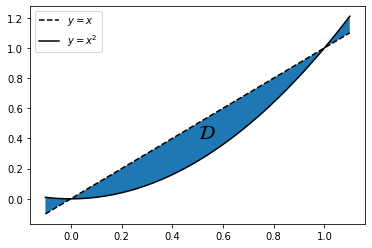

In [33]:
x = np.linspace(-0.1,1.1)
y1 = x
y2 = x**2

plt.plot(x,y1, 'k--', label='$y=x$')
plt.plot(x,y2, 'k', label='$y=x^2$')
plt.text(0.5,0.4, '$\mathcal{D}$', fontsize=20 )
plt.fill_between(x,y1,y2)
plt.legend(loc='best')
plt.show()

De cálculo integral, sabemos que

$$A(\mathcal{D})=\int_{0}^{1}(x-x^2)\text{d}x.$$

Entonces...

In [34]:
def f(x):
    return x - x**2


In [35]:
# Usar la funcion montecarlo1
A_D_approx = montecarlo_tipo1(f=f, a=0,b=1, N=10**7)
A_D_approx

0.16665307875465823

In [36]:
# La integral de (x - x**2) = (x^2/2 - x^3/3)|_0^1 = (1/2 -1/3) - (0^2/2 - 0^3/3) = 1/2 - 1/3
A_D_real = 1/2-1/3
A_D_real

0.16666666666666669

In [37]:
x = sc.symbols('x')
sc.Integral(f(x),x).doit()

-x**3/3 + x**2/2

De modo que si la región se puede describir fácilmente, entonces podemos aproximar la integral sin problema.

Pero, ¿qué pasa si la geometría de la región no se puede describir fácilmente?

Como en el caso anterior, motivaremos el método con un caso conocido. Vamos a aproximar el valor de $\pi$ usando el área de un círculo unitario.

Dibujemos el círculo unitario en la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$.

In [38]:
# Parte superior de circunferencia centrada en el origen
def circ_arriba(x, R):
    #La ecuación del circulo es : x^2 + y^2 = R^2,   c = (k,h) ---> (x-k)^2 + (y-h)^2 = R^2  
    # y^2 = R^2 - x^2
    # y = np.sqrt(R^2 - x^2)
    return np.sqrt(R**2 - x**2)
# Parte inferior de circunferencia centrada en el origen
def circ_abajo(x, R):
    return -np.sqrt(R**2 - x**2)

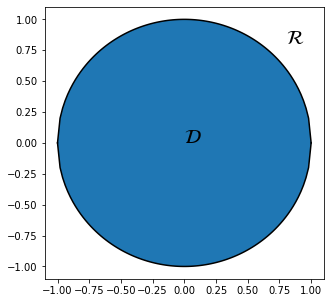

In [39]:
x = np.linspace(-1,1, 100)
y1 = circ_arriba(x,R=1)
y2 = circ_abajo(x, R=1)

plt.figure(figsize=(5,5))
plt.plot(x,y1,'k') #Plot de la parte de arriba del circulo
plt.plot(x,y2,'k') #Plot de la parte de arriba del circulo
plt.fill_between(x,y1,y2)
plt.text(0,0,'$\mathcal{D}$', fontsize=20)
plt.text(0.8,0.8,'$\mathcal{R}$', fontsize=20)
plt.show()

Si aproximamos $A(\mathcal{D})$ aproximamos el valor de $\pi$, pues el área del círculo unitario es:

$$A(\mathcal{D})=\pi(1)^2=\pi.$$

Por otra parte es claro que el área de la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$ es

$$A(\mathcal{R})=4.$$

Ahora, haremos uso de nuestro generador de números aleatorios. Supongamos que escogemos un punto aleatorio en la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$. Describimos este punto como $(X,Y)$ para $X$ e $Y$ variables aleatorias uniformes sobre el intervalo $\left[-1,1\right]$.

¿Cómo generamos puntos aleatorios en un rectángulo?

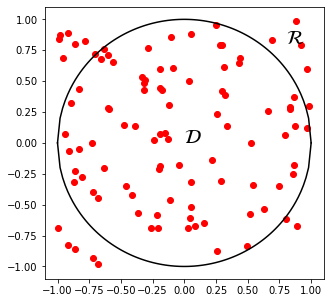

In [40]:
# Se generan variables aleatorias para cada dimensión
N = 100
x_p = np.random.uniform(low=-1, high=1, size=N)
y_p = np.random.uniform(low=-1, high=1, size=N)

#(x1,y1)-->p1 en la región R 
#(x2,y2)--->p2
#...
#(xn,yn)-->pn
x = np.linspace(-1,1, 100)
plt.figure(figsize=(5,5))
plt.plot(x,y1,'k') #Plot de la parte de arriba del circulo
plt.plot(x,y2,'k') #Plot de la parte de arriba del circulo
plt.scatter(x_p,y_p, c='r')
#plt.fill_between(x,y1,y2)
plt.text(0,0,'$\mathcal{D}$', fontsize=20)
plt.text(0.8,0.8,'$\mathcal{R}$', fontsize=20)
plt.show()

La probabilidad de que el punto $(X,Y)$ esté en el círculo unitario $\mathcal{D}$ es

$$P((X,Y)\in\mathcal{D})=\frac{A(\mathcal{D})}{A(\mathcal{R})}=\frac{\pi}{4}.$$

Luego, definimos una variable aleatoria de Bernoulli $B$ de manera que

$$B=\left\lbrace\begin{array}{ccc}0 & \text{si} & (X,Y)\notin\mathcal{D}\\1 & \text{si} & (X,Y)\in\mathcal{D} \end{array}\right.=\left\lbrace\begin{array}{ccc}0 & \text{si} & X^2+Y^2>1\\1 & \text{si} & X^2+Y^2\leq 1 \end{array}\right..$$

Entonces, el valor esperado de la variable aleatoria $B$ es

$$E\left[B\right]=\theta=P((X,Y)\in\mathcal{D})=\frac{A(\mathcal{D})}{A(\mathcal{R})}.$$

De lo anterior, una estimación de theta se puede obtener como

$$\theta=\frac{A(\mathcal{D})}{A(\mathcal{R})}\approx \frac{1}{N}\sum_{i=1}^{N}b_i,$$

donde 

$$b_i=\left\lbrace\begin{array}{ccc}0 & \text{si} & x_i^2+y_i^2>1\\1 & \text{si} & x_i^2+y_i^2\leq 1 \end{array}\right.$$

son realizaciones de la variable aleatoria $B$, que a su vez es producto de las realizaciones $x_i$ e $y_i$ de las variables aleatorias $X$ e $Y$, respectivamente.

Finalmente, la aproximación montecarlo tipo 2 con $N$ términos es 

$$A(\mathcal{D})\approx \frac{A(\mathcal{R})}{N}\sum_{i=1}^{N}b_i.$$

In [41]:
# Se generan variables aleatorias para cada dimensión
def bernoulli_circulo(x,y,R):
    return x**2 + y**2 <= R**2

In [42]:
# Función que devuelve True si está dentro del círculo
# y False de lo contrario
bernoulli_circulo(x=0,y=0,R=1)

True

In [43]:
bernoulli_circulo(x=1,y=1,R=1)

False

In [44]:
N

100

In [45]:
# Área del rectángulo
A_R = 4
N=10**7
x_p = np.random.uniform(low=-1, high=1, size=N)
y_p = np.random.uniform(low=-1, high=1, size=N)
#Obtención de la variable de bernoulli
b = bernoulli_circulo(x=x_p,y=y_p,R=1)
# Aproximación por montecarlo tipo 2
A_D_approx = b.mean()*A_R
A_D_approx

3.1412044

De nuevo, comparemos con el valor exacto.

In [46]:
# Valor exacto del area AD
A_D_real = np.pi
#Cantidade de términos 10,100,..,10**7
n_terminos = np.logspace(1,7,7).astype(int)
#Crear tabla
tabla = pd.DataFrame(index= n_terminos, columns =['Approx','error'])

for n in n_terminos:
    #Generar los puntos aleatorios uniformemente distribuidos en (x,y)
    x_p = np.random.uniform(low=-1, high=1, size=n)
    y_p = np.random.uniform(low=-1, high=1, size=n)
    #Generar la variable de bernoulli
    b = bernoulli_circulo(x=x_p,y=y_p,R=1)
    #Encontrar la aproximación de la región D
    A_D_approx = b.mean()*A_R
    
    tabla.loc[n,'Approx'] = A_D_approx
    tabla.loc[n,'error'] = np.abs(A_D_approx - A_D_real)

    

In [47]:
np.pi

3.141592653589793

In [48]:
tabla

,Approx,error
10,3.2,0.058407
100,3.08,0.061593
1000,3.212,0.070407
10000,3.116,0.025593
100000,3.131,0.010593
1000000,3.141976,0.000383
10000000,3.141394,0.000198


Escribamos una función que tenga como entradas:
- la función que describe la region $region$,
- los límites de la region $a_1$, $b_1$, $a_2$ y $b_2$, con $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y
- el número de términos que se usará en la aproximación $N$,

y que devuelva la aproximación montecarlo tipo 2 del area de la region.

In [49]:
# Escribir la función acá
def montecarlo_tipo2(fb,a1,b1,a2,b2,N):
    #El área del rectangulo
    A_R = (b1-a1)*(b2-a2)
    #Generar los puntos aleatorios uniformemente distribuidos en (x,y)
    x_p = np.random.uniform(low=-1, high=1, size=N)
    y_p = np.random.uniform(low=-1, high=1, size=N)
    #Generar la variable de bernoulli
    b = fb(x=x_p,y=y_p,R=1)
    #Encontrar la aproximación de la región D
    A_D_approx = b.mean()*A_R
    return A_D_approx

In [50]:
#Cantidade de términos 10,100,..,10**7
n_terminos = np.logspace(1,7,7).astype(int)
#Crear tabla
tabla = pd.DataFrame(index= n_terminos, columns =['Approx','error'])

for n in n_terminos:
    A_D_approx = montecarlo_tipo2(bernoulli_circulo,a1=-1,b1=1,a2=-1,b2=1,N=n)
    tabla.loc[n,'Approx'] = A_D_approx
    tabla.loc[n,'error'] = np.abs(A_D_approx - A_D_real)

tabla

,Approx,error
10,3.2,0.058407
100,3.2,0.058407
1000,3.096,0.045593
10000,3.1396,0.001993
100000,3.1474,0.005807
1000000,3.141748,0.000155
10000000,3.141119,0.000473


In [51]:
def tabla_montecarlo_tipo2():

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_65876/901445698.py, line 1)

**Actividad.** Utilizar la anterior función para aproximar el área de la región descrita por

$$4(2x-1)^4+8(2y-1)^8<1+2(2y-1)^3(3x-2)^2$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos).

In [56]:
# Función de la región que queremos aproximar
def region(x,y):
    return 4*(2*x - 1)**4 + 8*(2*y - 1)**8 < 1 + 2*(2*y -1)**3*(3*x - 2)**2

In [57]:
region(0.4,0.4)

True

In [58]:
# Dibujemos la región
N=10**7
x = np.random.uniform(0,1,N)
y = np.random.uniform(0,1,N)
dentro_region = region(x,y)
# (x,y) --->p1  (0,0) ---> False x
# (0.4,0.4) --->p2 True 

In [63]:
dentro_region

array([False,  True, False, ..., False,  True,  True])

In [59]:
x_e = np.array([2,5,7,8,0])
y_e = np.array([0,2,7,1,0])
# (x_e,y_e) 
reg = np.array([True,False,True,False,False])


In [62]:
x_e[reg], y_e[reg]

(array([2, 7]), array([0, 7]))

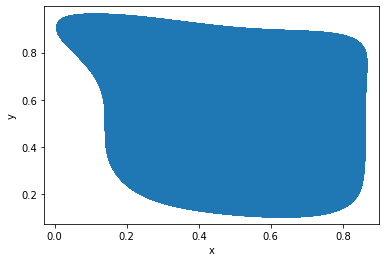

In [64]:
plt.figure(figsize=(6,4))
plt.scatter(x[dentro_region], y[dentro_region])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [69]:
# Función de montecarlo tipo2 para cualquier región que reciba los parámetros (x,y)
def montecarlo_tipo2(fb,a1,b1,a2,b2,N):
    #El área del rectangulo
    A_R = (b1-a1)*(b2-a2)
    #Generar los puntos aleatorios uniformemente distribuidos en (x,y) en la region R
    x_p = np.random.uniform(low=a1, high=b1, size=N)
    y_p = np.random.uniform(low=a2, high=b2, size=N)
    #Generar la variable de bernoulli
    b = fb(x=x_p,y=y_p)
    #Encontrar la aproximación de la región D
    A_D_approx = b.mean()*A_R
    return A_D_approx

In [70]:
# Resolver (Crea una función para generar automáticamente la tabla)
n_terminos = np.logspace(1,7,7).astype(int)
tabla = pd.DataFrame(index = n_terminos, columns=['approx'])
for n in n_terminos:
    A_D_approx = montecarlo_tipo2(fb=region,a1=0,b1=1,a2=0,b2=1,N=n)
    tabla.loc[n,'approx'] = A_D_approx

In [71]:
tabla

,approx
10,0.5
100,0.43
1000,0.545
10000,0.5503
100000,0.54865
1000000,0.546304
10000000,0.546555


In [75]:
delta = 0.1
a1,b1 =x[dentro_region].min()-delta, x[dentro_region].max()+delta
a2,b2 = y[dentro_region].min()-delta, y[dentro_region].max()+delta
print('Valores de x para la región R',(a1,b1))
print('Valores de y para la región R',(a2,b2))

Valores de x para la región R (-0.08733228202372059, 0.9579551143387534)
Valores de y para la región R (0.015909506527341993, 1.0539540592637509)


In [76]:
# Resolver (Crea una función para generar automáticamente la tabla)
n_terminos = np.logspace(1,7,7).astype(int)
tabla = pd.DataFrame(index = n_terminos, columns=['approx'])
for n in n_terminos:
    A_D_approx = montecarlo_tipo2(fb=region,a1=a1,b1=b1,a2=a2,b2=b2,N=n)
    tabla.loc[n,'approx'] = A_D_approx

In [77]:
tabla

,approx
10,0.542527
100,0.553378
1000,0.545783
10000,0.546325
100000,0.543916
1000000,0.546804
10000000,0.546922


### Integración de montecarl tipo 2, ejemplo:

Considerar la región definida por $f(x,y) >v$, en donde 

$$f(x,y)= e^{-0.05(x^2 + y^2)}cos(x^2 + y^2)$$

$$v=0.5$$

Encontrar el área de la región definida por $f(x,y) >v$

In [ ]:
def f_region(x,y):
    f_r = 
    v = 0.5
    return f_r>v


In [ ]:
#1.- Graficar la región
#2.- Encontrar los limites de la región y obtener a1,b1,a2,b2
#3.- Obtener la aproximación en una tabla con términos 10,100,1000,...,10**7
#4.- mostrar la tabla